In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filebase = 'data/fbpac-ads-en-US-cleaned'

print(f'Reading file {filebase}.csv...', end='', flush=True)
df = pd.read_csv(filebase + '.csv')
print(' done')

Reading file data/fbpac-ads-en-US-cleaned.csv... done


In [3]:
df.columns

Index(['political', 'not_political', 'title', 'message', 'created_at',
       'updated_at', 'impressions', 'political_probability', 'advertiser',
       'lower_page', 'paid_for_by', 'targetedness',
       'listbuilding_fundraising_proba', 'Gender', 'Age', 'Retargeting',
       'Interest', 'Segment', 'State', 'Language', 'Website', 'City',
       'Activity on the Facebook Family', 'MaxAge', 'Like', 'MinAge',
       'RegionTarget', 'Agency', 'Organization', 'Event', 'Law',
       'RegionEntity', 'Group', 'Location', 'Facility', 'Person',
       'Created_At_Year', 'Created_At_Month', 'Updated_At_Year',
       'Updated_At_Month', 'political_probability_int',
       'fundraising_proba_int', 'is_political', 'is_not_political',
       'is_impressions'],
      dtype='object')

In [4]:
print(df.shape)
df.head()

(162324, 45)


,political,not_political,title,message,created_at,updated_at,impressions,political_probability,advertiser,lower_page,...,Person,Created_At_Year,Created_At_Month,Updated_At_Year,Updated_At_Month,political_probability_int,fundraising_proba_int,is_political,is_not_political,is_impressions
0,0,0,League of Conservation Voters,BREAKING: Trump’s Department of the Interior p...,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,1,0.999992,NaN,lcvoters,...,NaN,2019,3,2019,3,8,5.0,0,0,1
1,0,0,Indivisible Guide,The Mueller investigation is over. Special Cou...,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,1,0.999997,NaN,indivisibleguide,...,Barr,2019,3,2019,3,8,2.0,0,0,1
2,0,0,International Rescue Committee,Zimbabwe is reeling from the impact of Cyclone...,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,1,0.977570,NaN,internationalrescuecommittee,...,NaN,2019,3,2019,3,8,8.0,0,0,1
3,0,0,Covenant House International,What more can you do in the final hours of 201...,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,1,0.360711,Covenant House International,covenanthouse,...,NaN,2018,12,2018,12,2,NaN,0,0,1
4,0,1,Planned Parenthood,"Say it loud, say it proud: Our rights, our hea...",2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,1,0.999998,NaN,plannedparenthood,...,NaN,2019,3,2019,4,8,8.0,0,1,1


In [5]:
df.describe()

,political,not_political,impressions,political_probability,targetedness,listbuilding_fundraising_proba,Activity on the Facebook Family,MaxAge,Like,MinAge,Created_At_Year,Created_At_Month,Updated_At_Year,Updated_At_Month,political_probability_int,fundraising_proba_int,is_political,is_not_political,is_impressions
count,162324.000000,162324.000000,162324.000000,162324.000000,112747.000000,152394.000000,162324.000000,6691.000000,162324.000000,113104.000000,162324.000000,162324.000000,162324.000000,162324.000000,162324.000000,152394.000000,162324.000000,162324.000000,162324.000000
mean,4.177663,0.794214,4.605049,0.928099,3.939723,0.545964,0.023539,48.667015,0.047399,21.637148,2018.164566,7.266128,2018.204480,7.161529,7.468470,3.841851,0.527039,0.102111,0.998620
std,10.574403,2.770883,40.689815,0.169513,1.758957,0.333821,0.151609,11.555999,0.212492,8.592950,0.548858,3.312281,0.558085,3.409968,1.506346,3.103390,0.499270,0.302795,0.037122
min,0.000000,0.000000,0.000000,0.000079,0.000000,0.000091,0.000000,17.000000,0.000000,13.000000,2017.000000,1.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.951812,3.000000,0.265190,0.000000,40.000000,0.000000,18.000000,2018.000000,5.000000,2018.000000,4.000000,8.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.997825,4.000000,0.423612,0.000000,49.000000,0.000000,18.000000,2018.000000,8.000000,2018.000000,7.000000,8.000000,3.000000,1.000000,0.000000,1.000000
75%,4.000000,1.000000,2.000000,0.999978,4.000000,0.999893,0.000000,56.500000,0.000000,18.000000,2018.000000,10.000000,2019.000000,10.000000,8.000000,8.000000,1.000000,0.000000,1.000000
max,488.000000,330.000000,3575.000000,1.000000,12.000000,1.230622,1.000000,65.000000,1.000000,65.000000,2019.000000,12.000000,2019.000000,12.000000,8.000000,8.000000,1.000000,1.000000,1.000000


In [6]:
df.select_dtypes

<bound method DataFrame.select_dtypes of         political  not_political  \
0               0              0   
1               0              0   
2               0              0   
3               0              0   
4               0              1   
5               0              0   
6               0              0   
7               0              0   
8               0              0   
9               0              0   
10              0              0   
11              0              0   
12              0              0   
13              0              0   
14              0              0   
15              0              0   
16              0              0   
17              0              0   
18              0              0   
19              7              5   
20              0              0   
21              0              0   
22              0              0   
23              0              0   
24              0              0   
25              0      

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2 = df.select_dtypes(include=numerics)

nan_list = df2.columns[df2.isna().any()].tolist()
print(nan_list)
df2 = df2.drop(columns=nan_list, inplace=False)

print(df2.shape)
df2.head()

['targetedness', 'listbuilding_fundraising_proba', 'MaxAge', 'MinAge', 'fundraising_proba_int']
(162324, 14)


,political,not_political,impressions,political_probability,Activity on the Facebook Family,Like,Created_At_Year,Created_At_Month,Updated_At_Year,Updated_At_Month,political_probability_int,is_political,is_not_political,is_impressions
0,0,0,1,0.999992,0,0,2019,3,2019,3,8,0,0,1
1,0,0,1,0.999997,0,0,2019,3,2019,3,8,0,0,1
2,0,0,1,0.977570,0,0,2019,3,2019,3,8,0,0,1
3,0,0,1,0.360711,1,0,2018,12,2018,12,2,0,0,1
4,0,1,1,0.999998,0,0,2019,3,2019,4,8,0,1,1


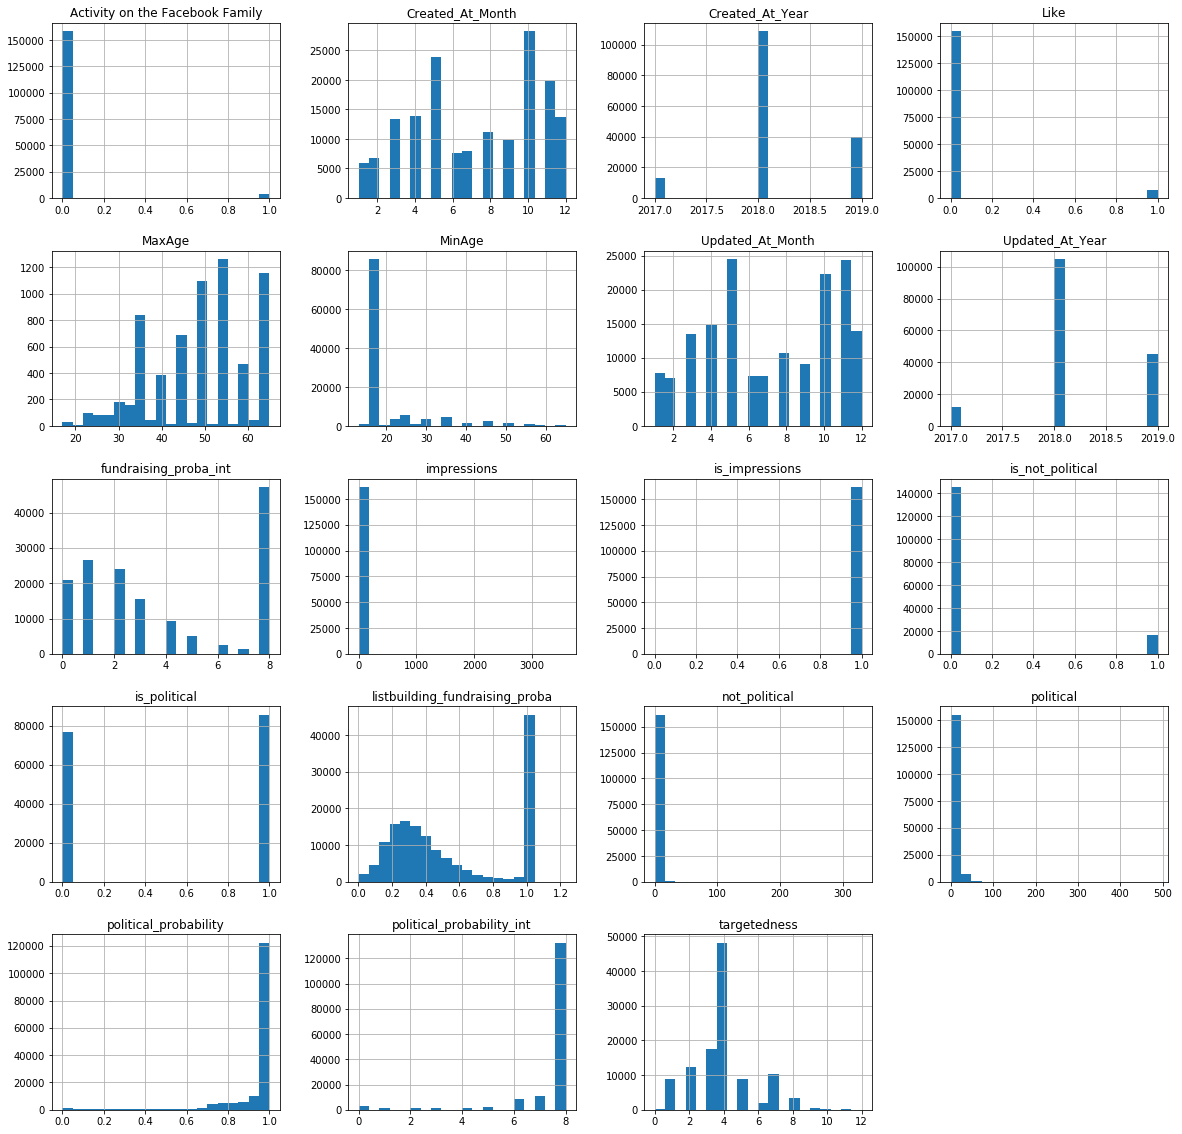

In [8]:
df.hist(bins=20, figsize=(20,20))
plt.show()

In [9]:
[df[x].value_counts() for x in df.columns]

[0      64822
 1      26679
 2      16591
 3      11460
 4       7960
 5       5625
 6       4189
 7       2985
 8       2161
 9       1543
 10      1445
 11      1031
 12       966
 13       827
 15       738
 16       728
 14       726
 17       618
 18       560
 26       553
 25       545
 20       544
 19       542
 23       533
 24       530
 27       515
 30       490
 21       490
 28       489
 22       479
        ...  
 333        1
 437        1
 76         1
 440        1
 254        1
 314        1
 443        1
 319        1
 192        1
 456        1
 449        1
 298        1
 215        1
 343        1
 95         1
 353        1
 97         1
 96         1
 410        1
 351        1
 411        1
 156        1
 471        1
 478        1
 349        1
 416        1
 475        1
 417        1
 474        1
 383        1
 Name: political, Length: 165, dtype: int64, 0      119582
 1       21398
 2        7945
 3        4083
 4        2289
 5        1540
 6        10

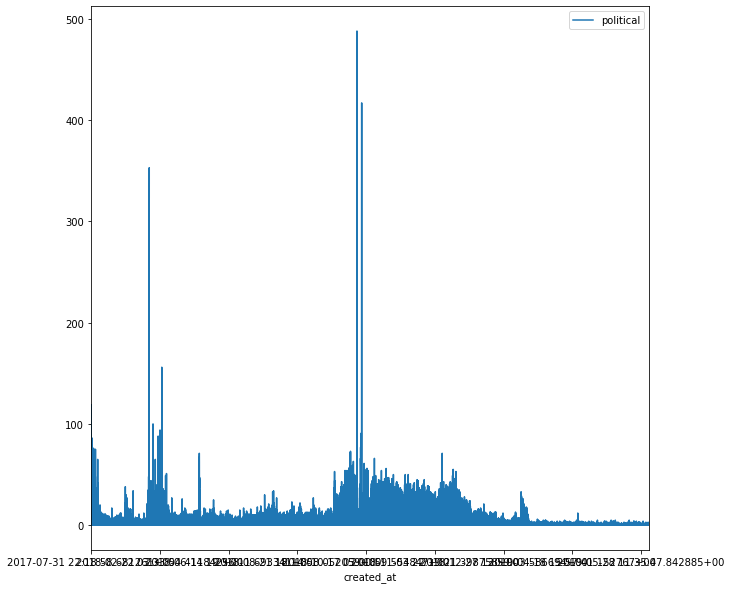

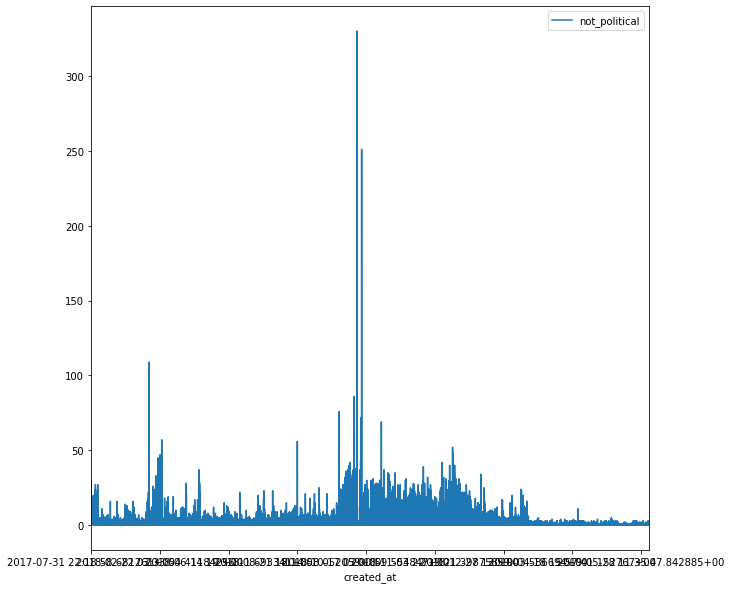

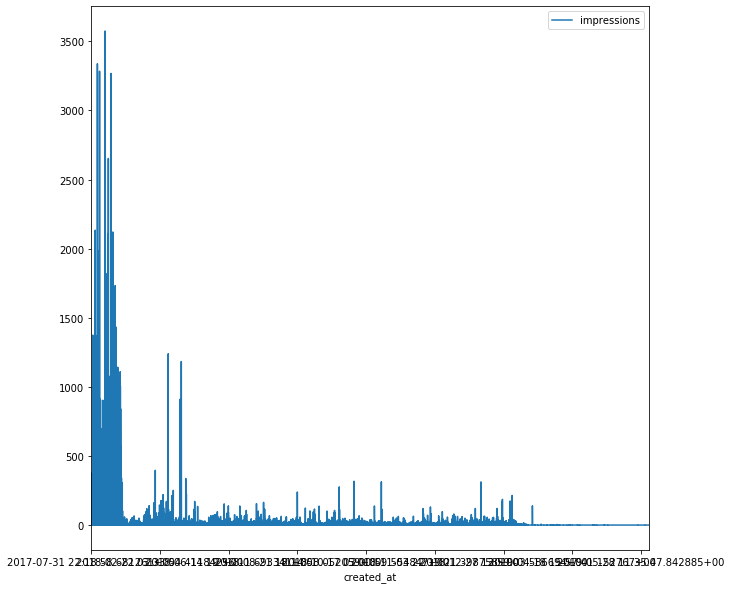

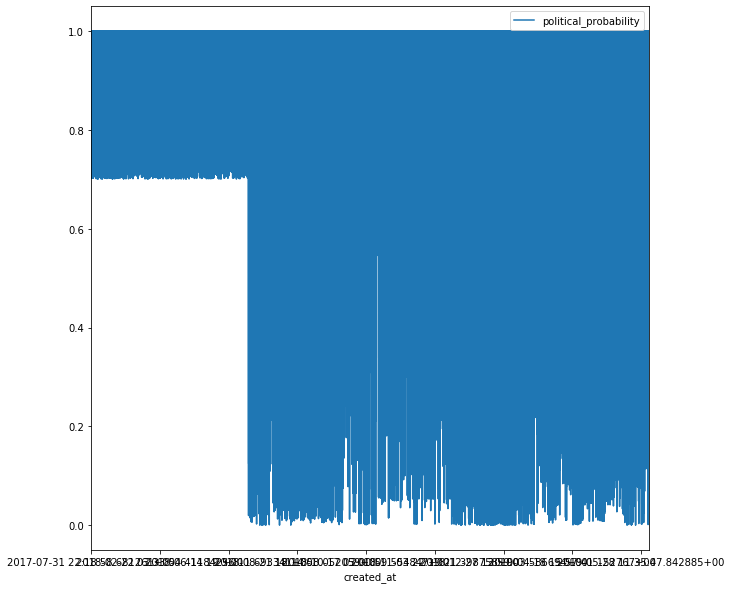

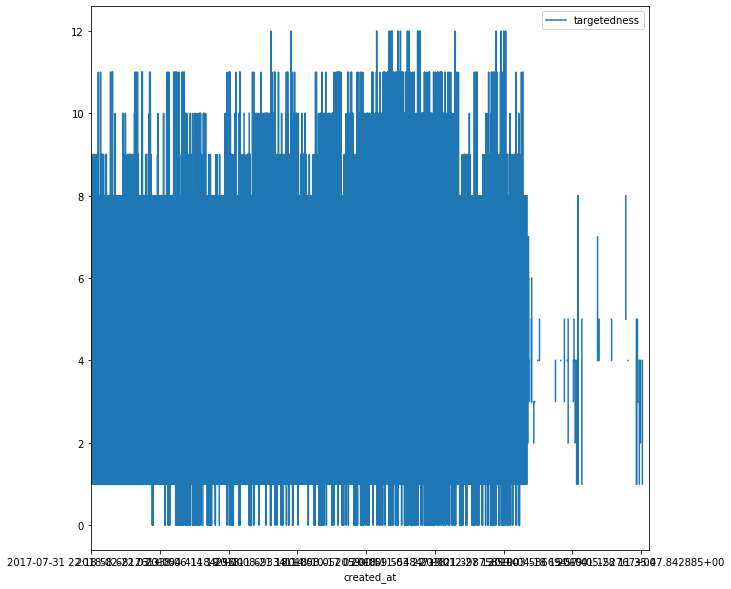

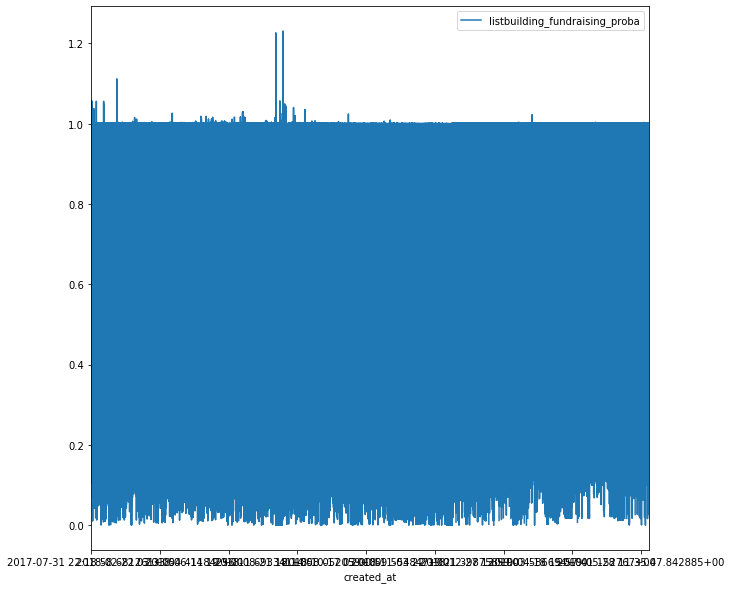

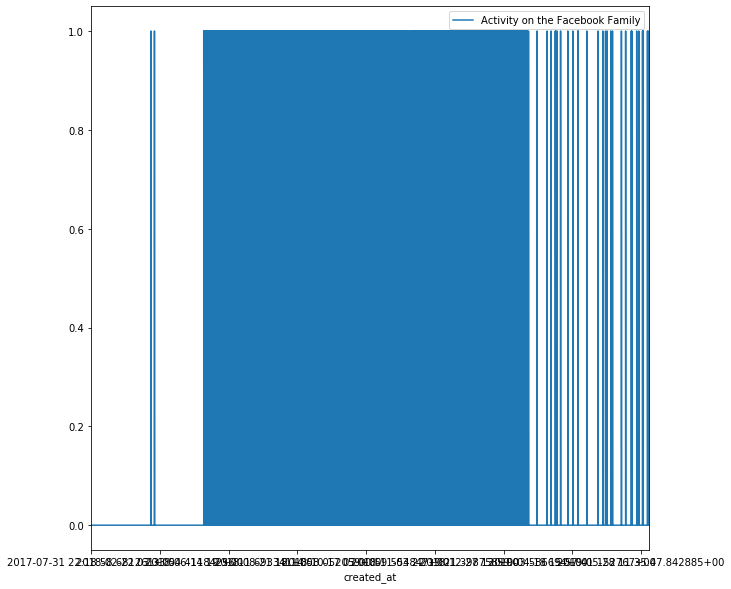

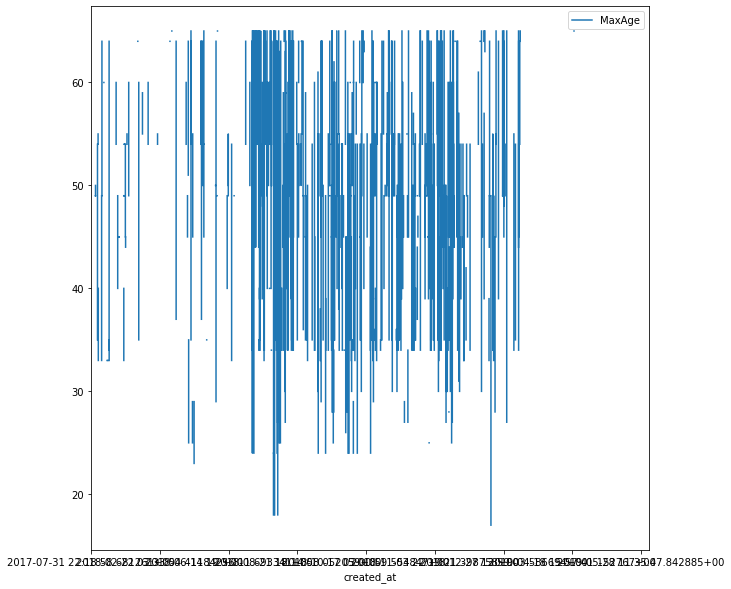

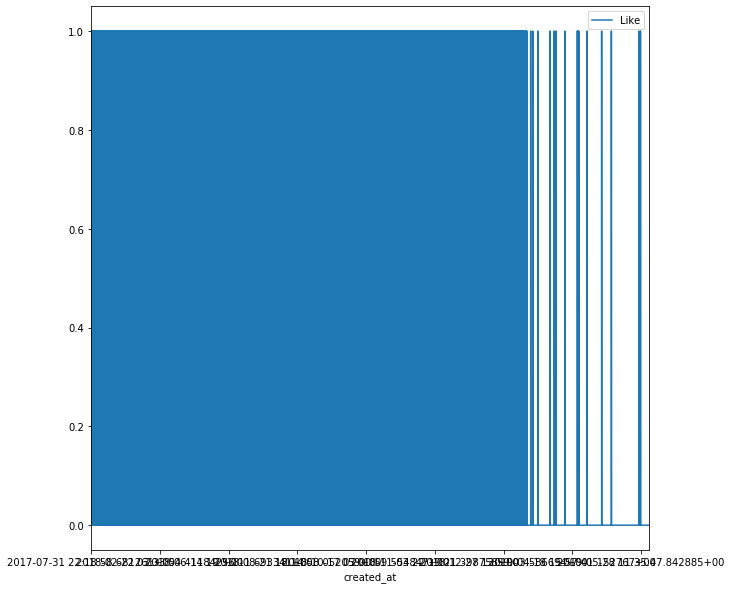

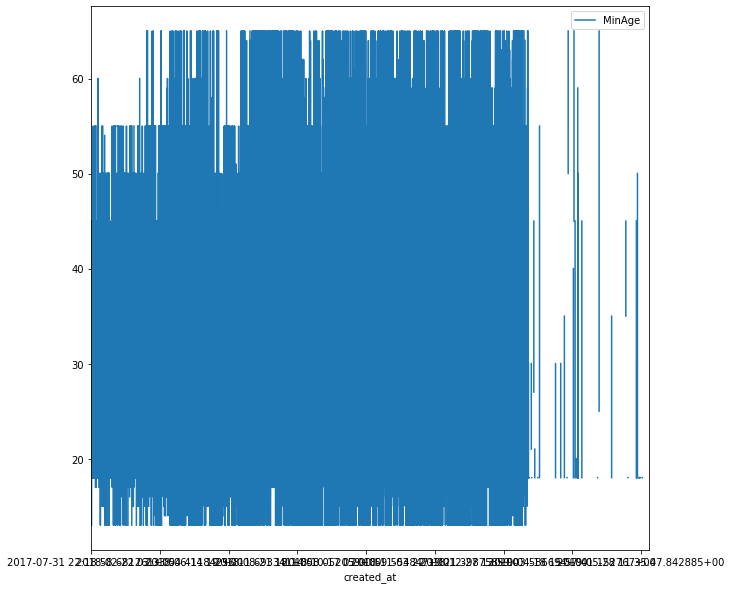

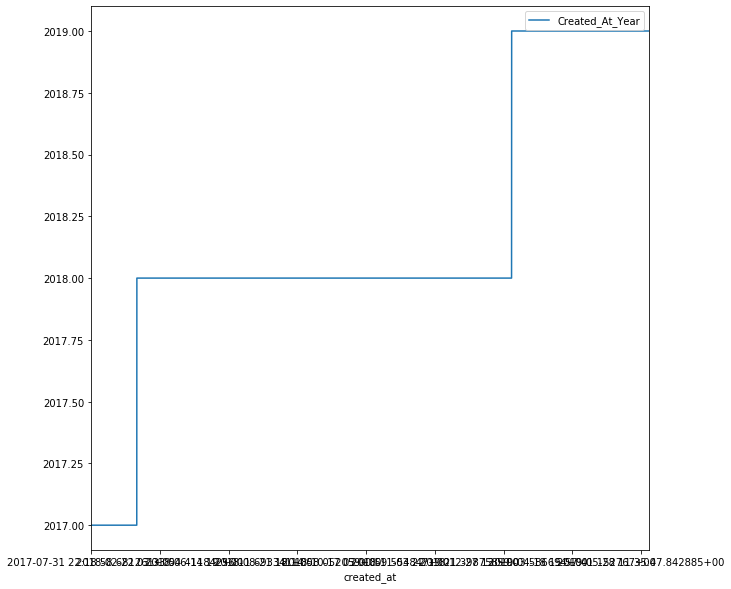

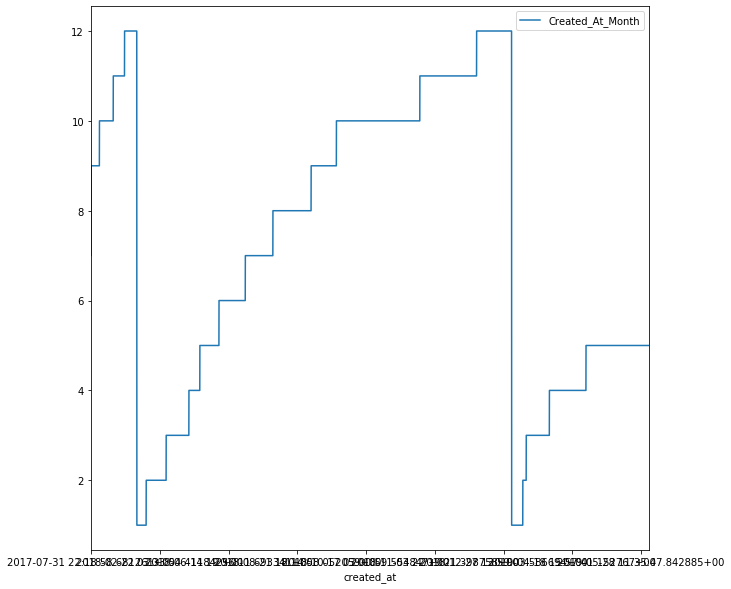

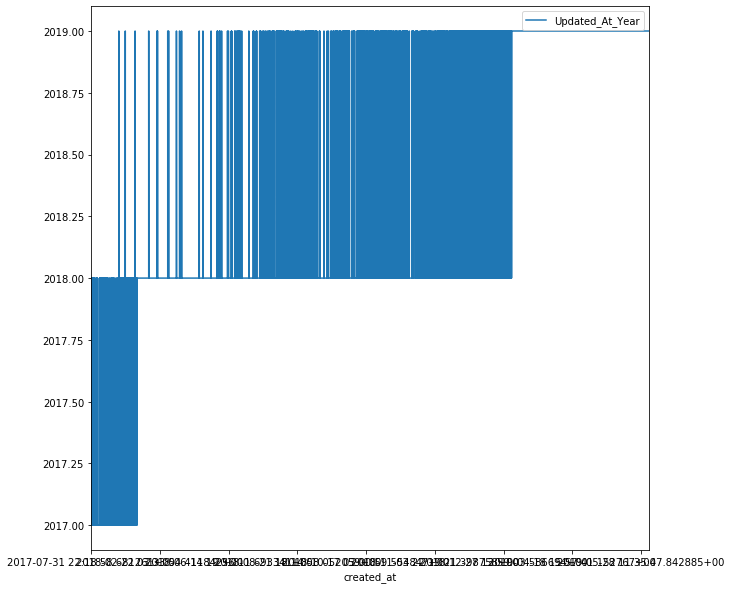

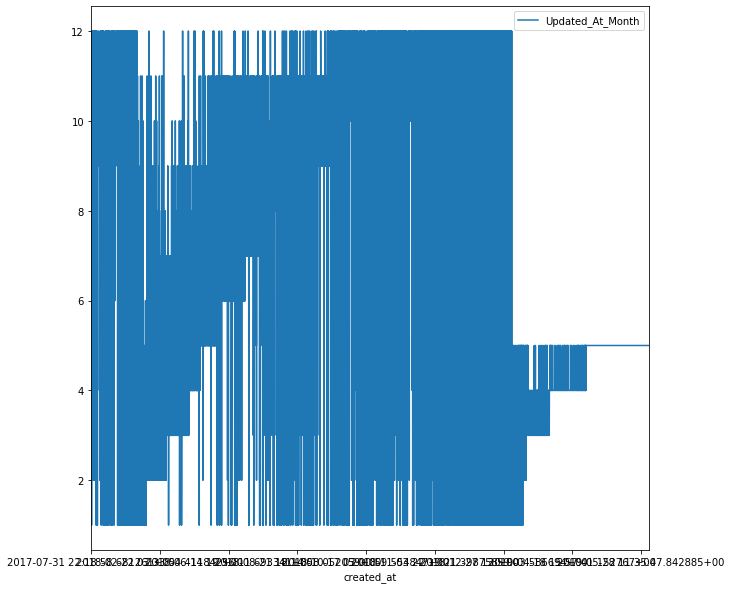

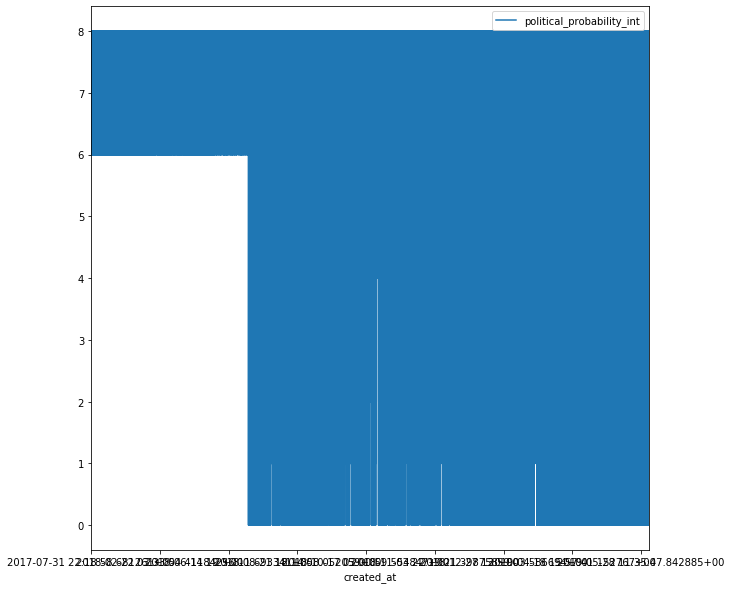

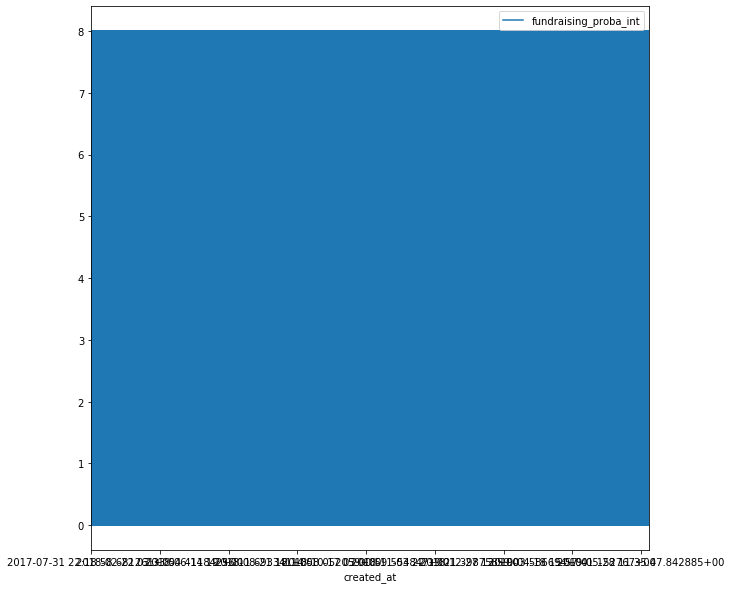

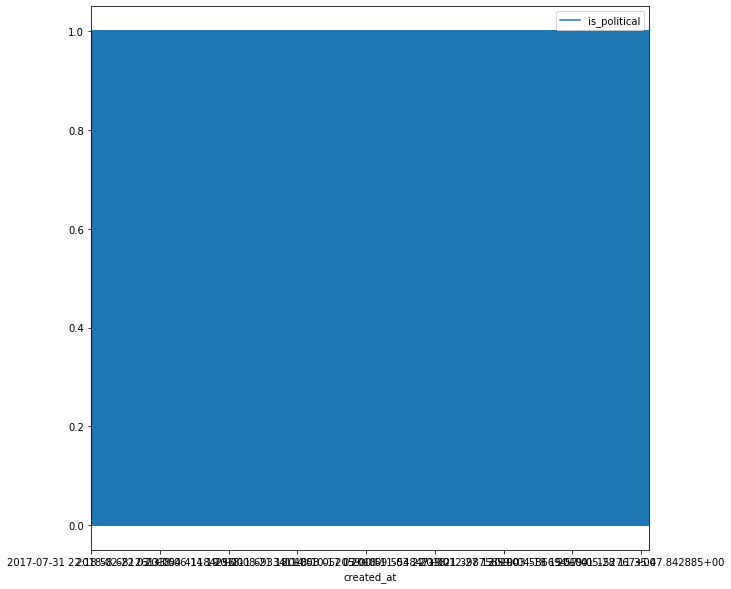

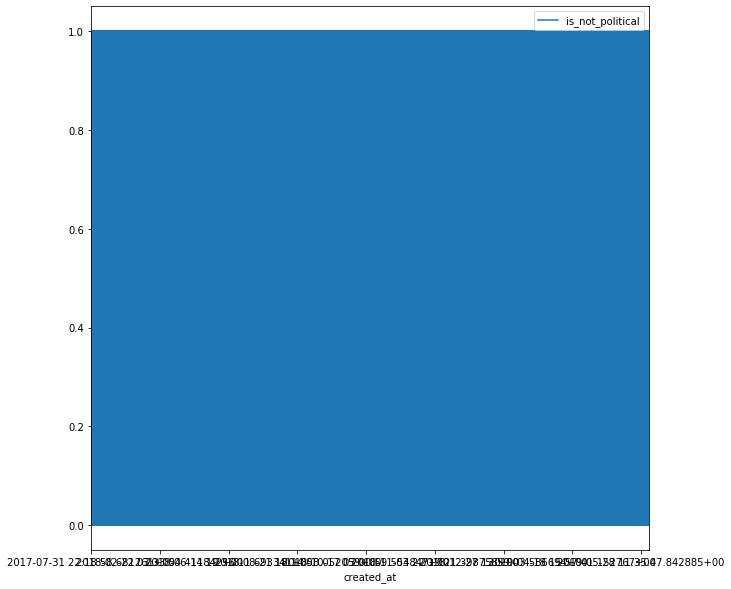

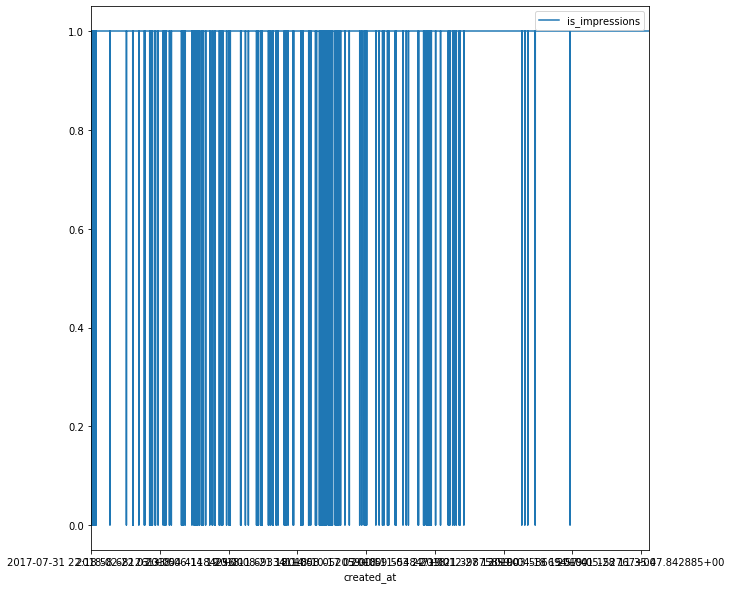

In [10]:
df_sort = df.sort_values('created_at')
[df_sort.plot(x='created_at', y=x, figsize=(10,10)) for x in df_sort.columns if np.issubdtype(df_sort[x].dtype, np.number)]
plt.show()

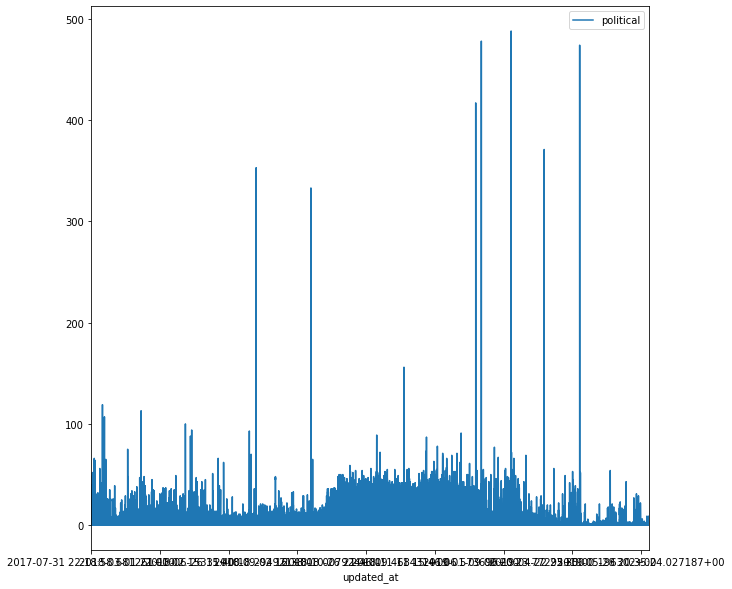

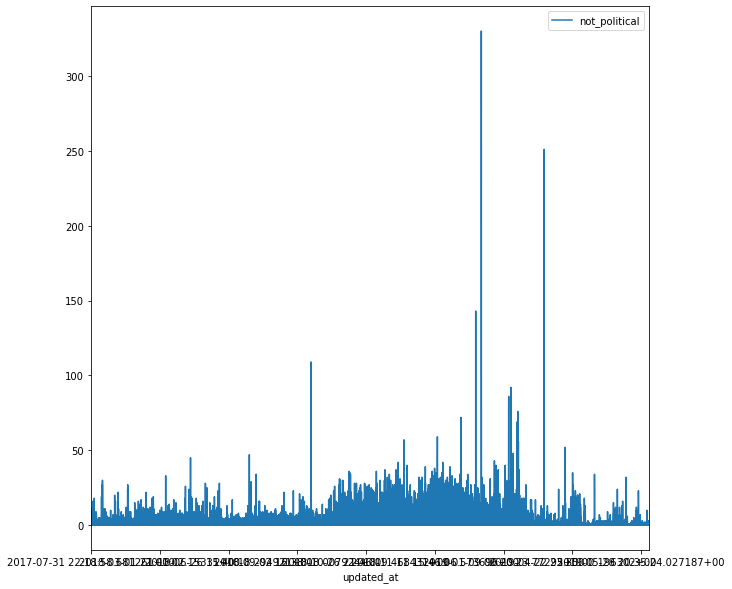

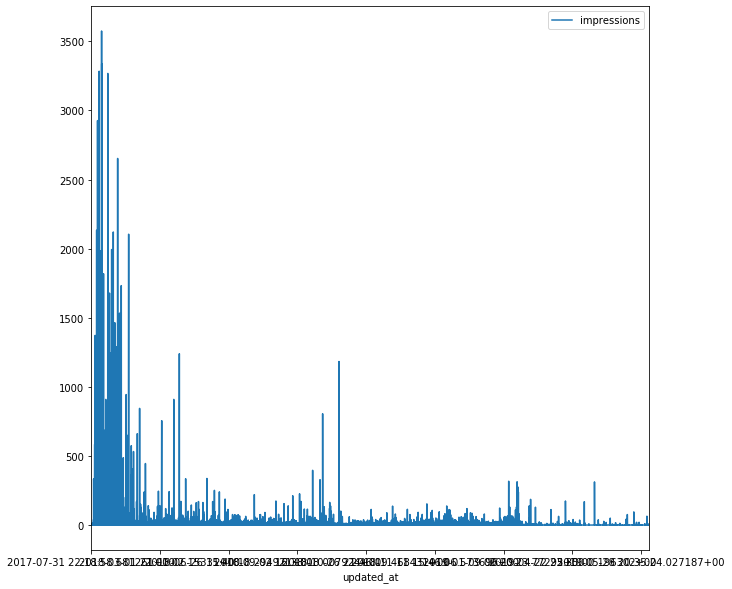

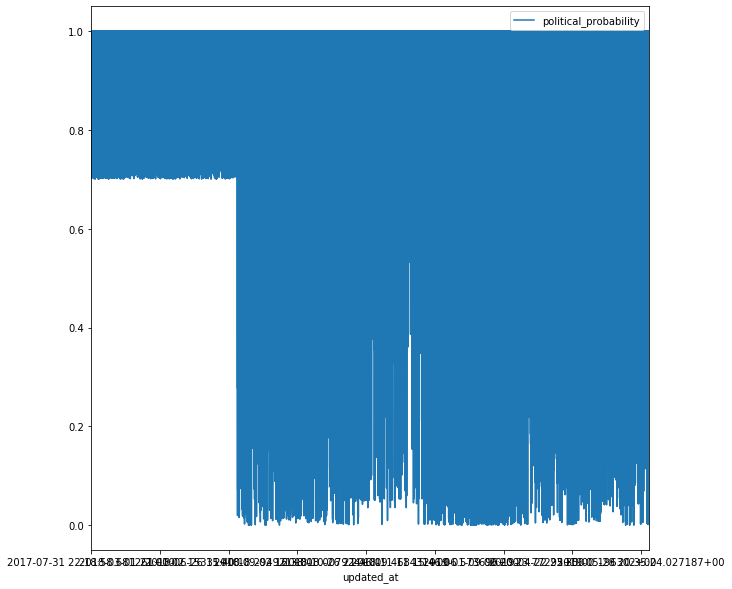

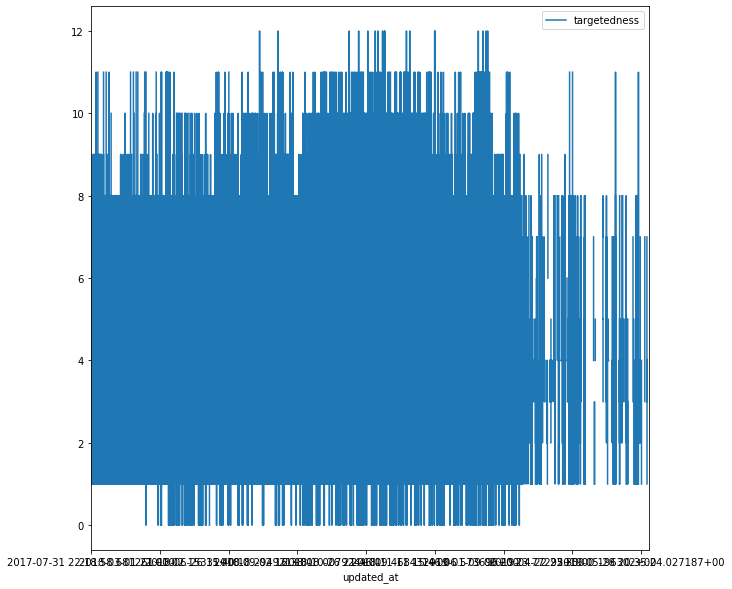

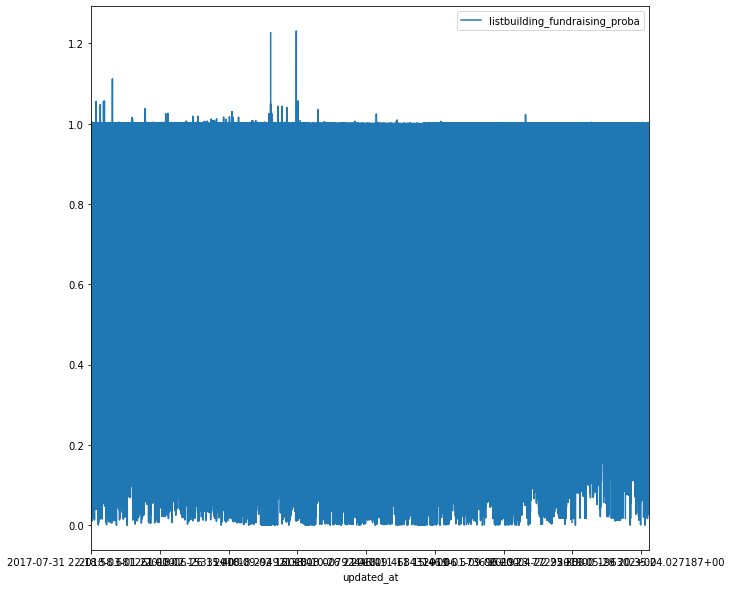

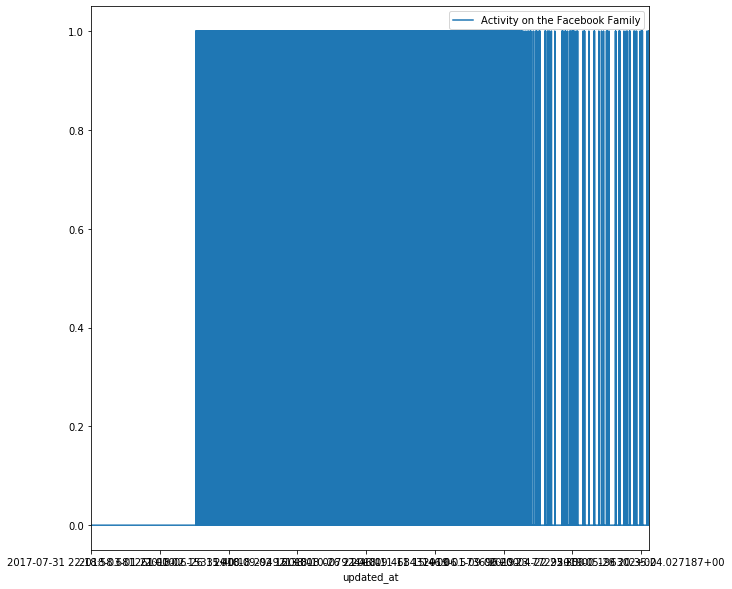

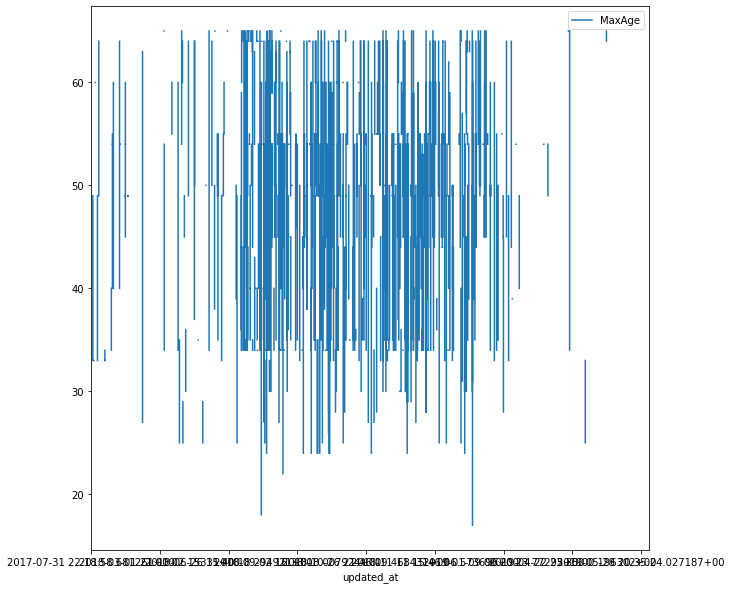

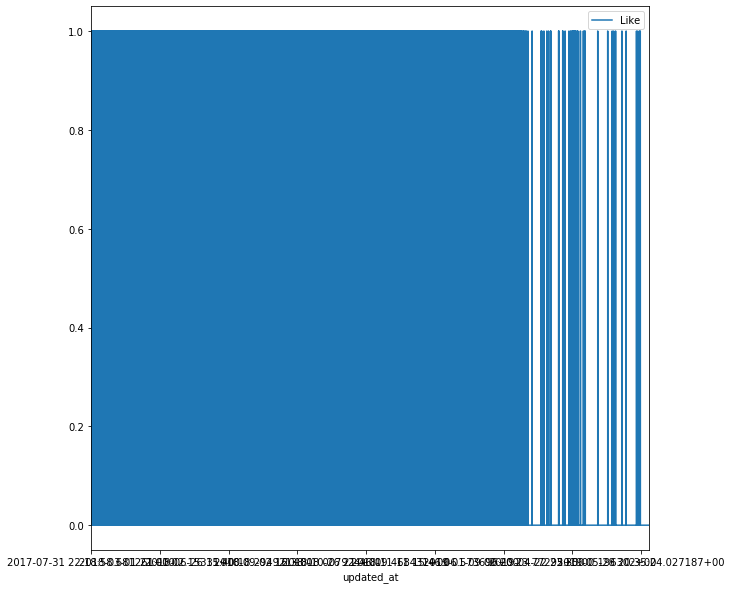

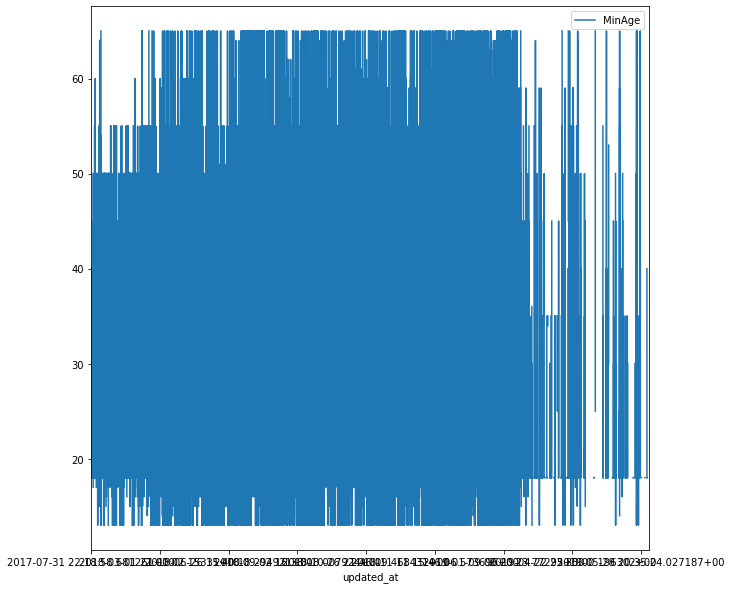

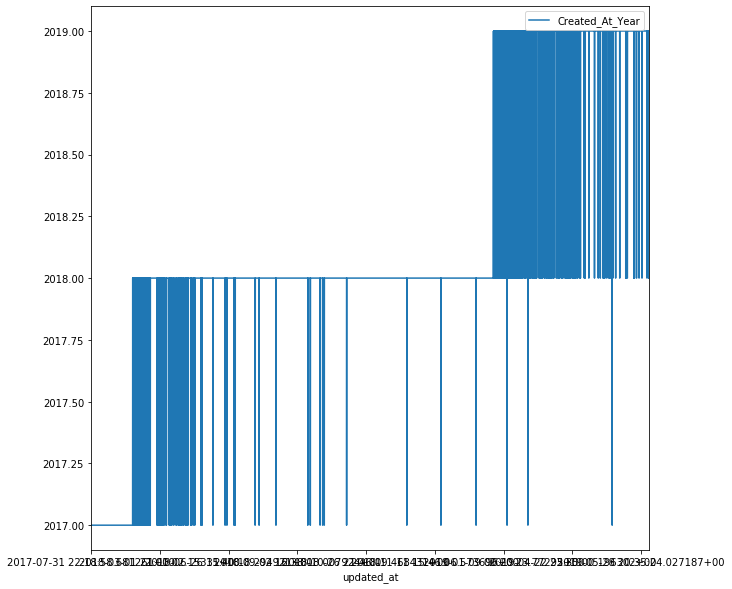

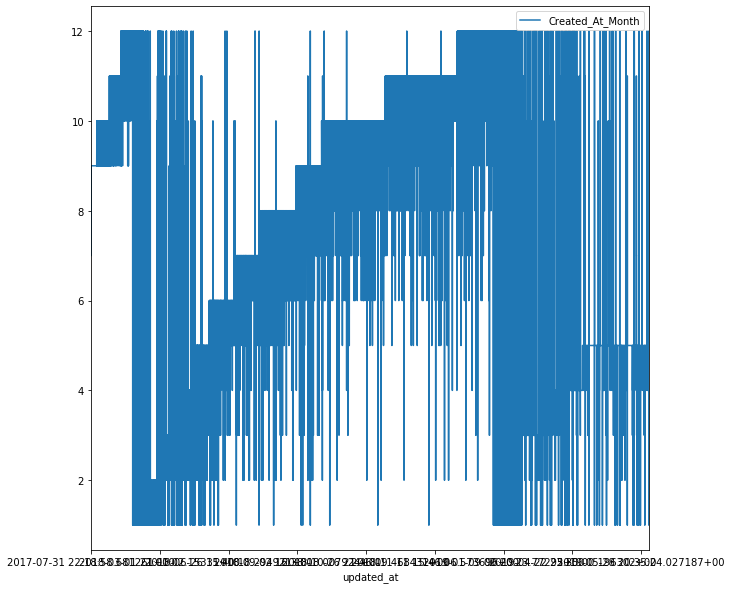

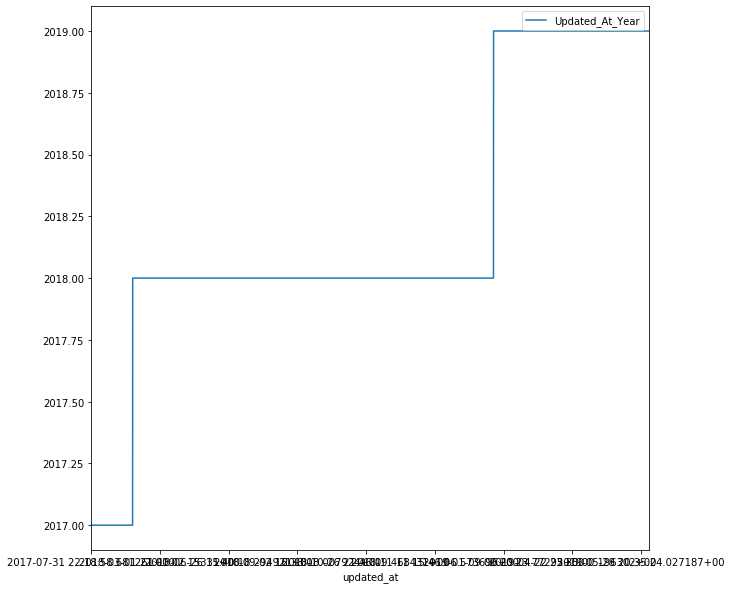

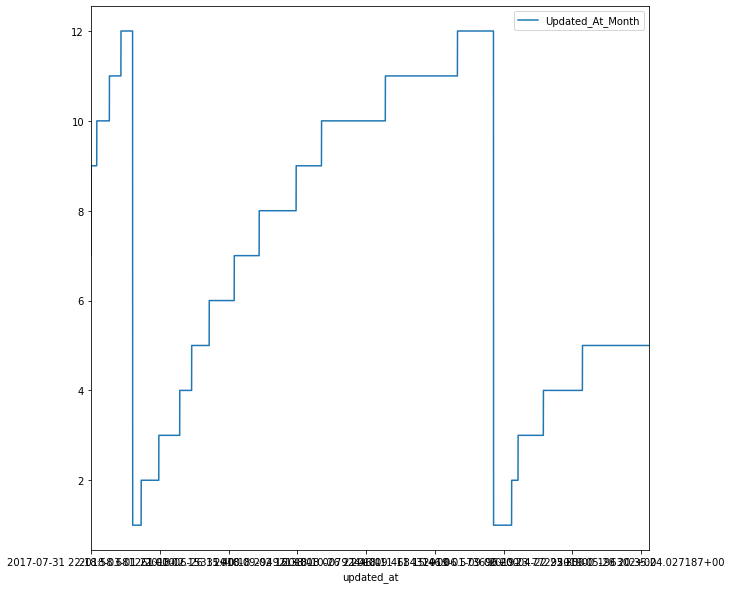

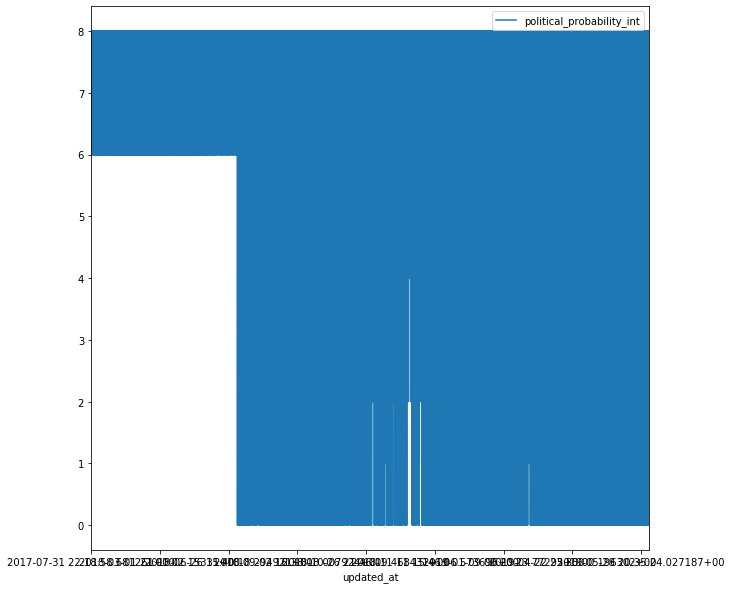

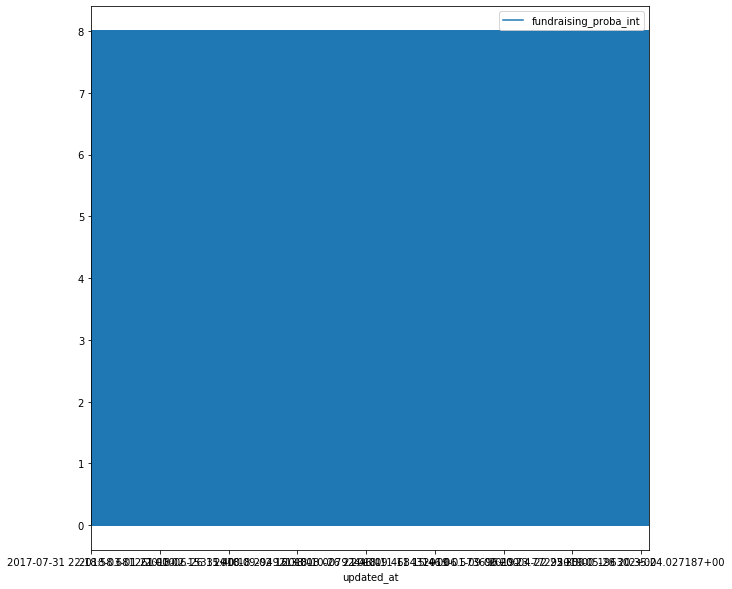

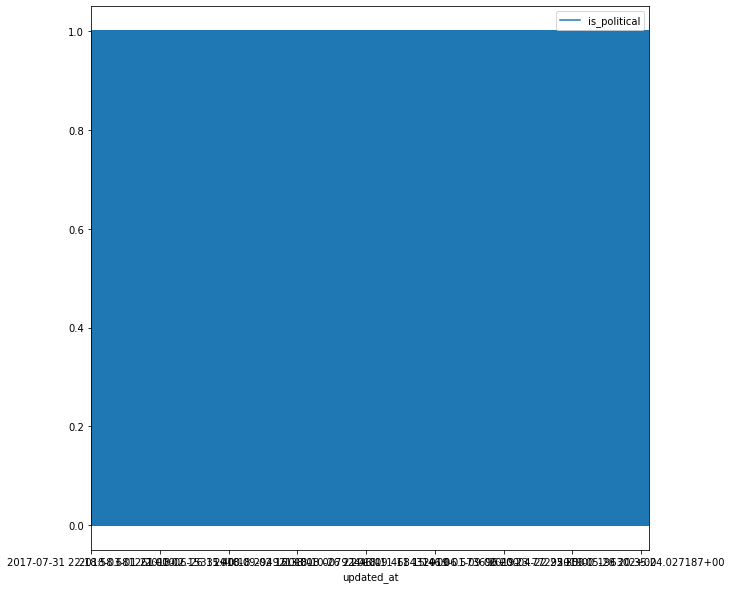

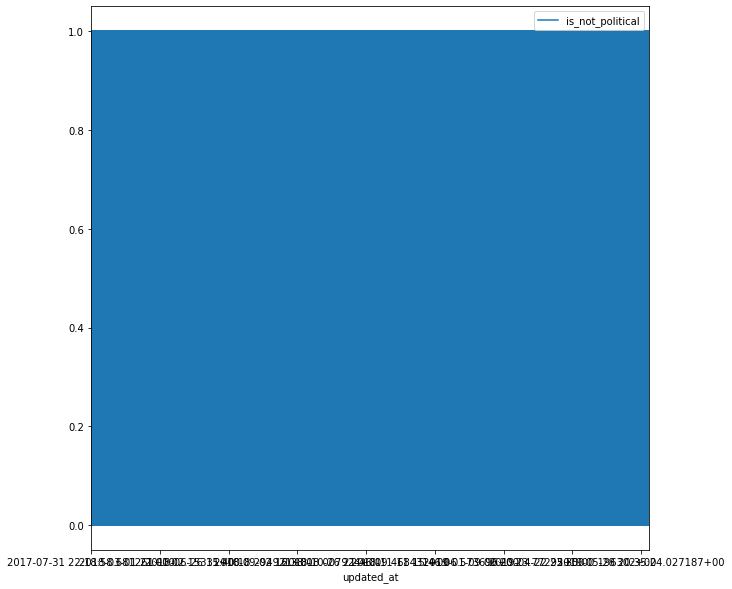

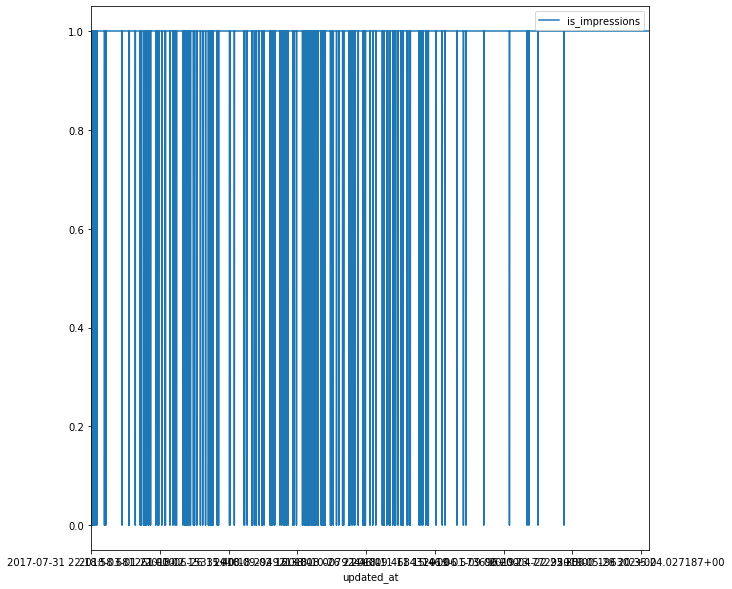

In [11]:
df_sort = df.sort_values('updated_at')
[df_sort.plot(x='updated_at', y=x, figsize=(10,10)) for x in df_sort.columns if np.issubdtype(df_sort[x].dtype, np.number)]
plt.show()

political


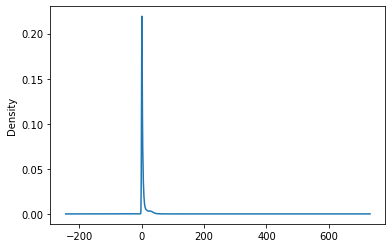

not_political


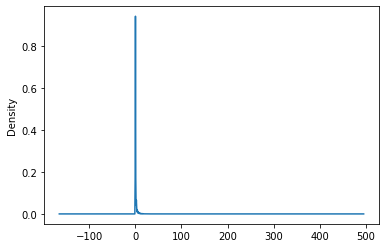

impressions


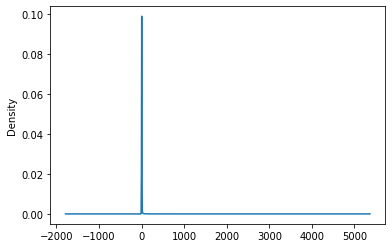

political_probability


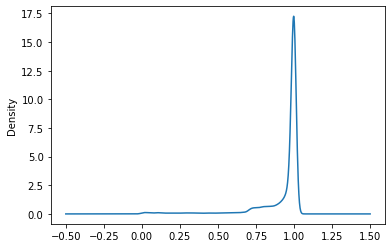

Activity on the Facebook Family


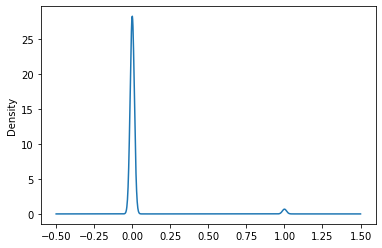

Like


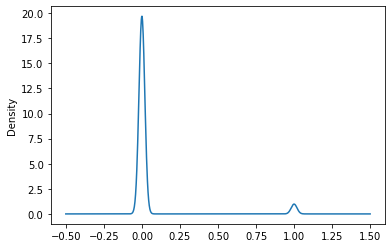

Created_At_Year


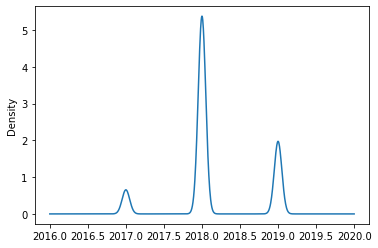

Created_At_Month


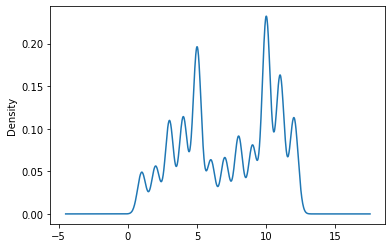

Updated_At_Year


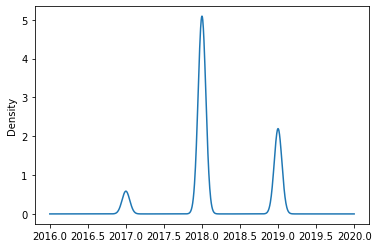

Updated_At_Month


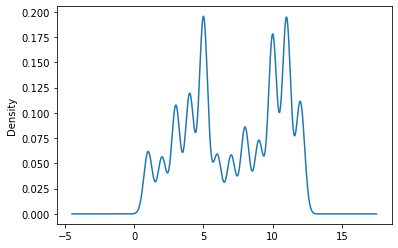

political_probability_int


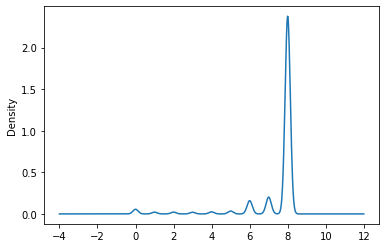

is_political


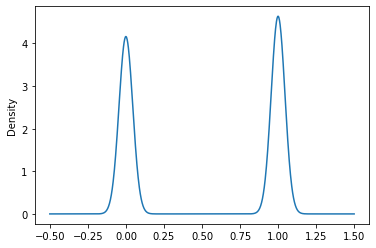

is_not_political


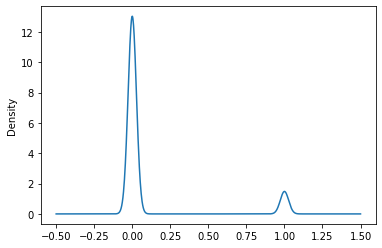

is_impressions


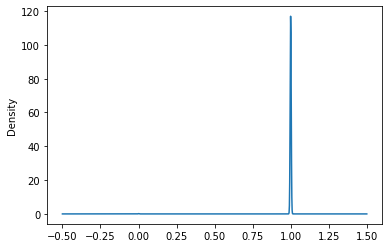

In [12]:
for x in df2.columns:
    print(x)
    df2[x].plot.kde()
    plt.show()